In [9]:
import os

os.system("sh sample.sh")

0

In [2]:
from raspi_import import raspi_import

data = raspi_import("data/adcData.bin")

print(data[1])

[[2234  899  967  254 3437]
 [ 124  120  124  140  162]
 [  52   44   53   55   63]
 ...
 [  26   17   28   23   26]
 [  26   17   28   23   26]
 [  23   14   25   20   23]]


In [21]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

def _check_arg(x, xname):
    x = np.asarray(x)
    if x.ndim != 1:
        raise ValueError('%s must be one-dimensional.' % xname)
    return x

def crosscorrelation(x, y, maxlag):
    """
    Cross correlation with a maximum number of lags.

    `x` and `y` must be one-dimensional numpy arrays with the same length.

    This computes the same result as
        numpy.correlate(x, y, mode='full')[len(a)-maxlag-1:len(a)+maxlag]

    The return vaue has length 2*maxlag + 1.
    """
    x = _check_arg(x, 'x')
    y = _check_arg(y, 'y')
    py = np.pad(y.conj(), 2*maxlag, mode='constant')
    T = as_strided(py[2*maxlag:], shape=(2*maxlag+1, len(y) + 2*maxlag),
                   strides=(-py.strides[0], py.strides[0]))
    px = np.pad(x, maxlag, mode='constant')
    return T.dot(px)
def maxindex(array, maxlag):
    result = np.argmax(array)
    return result-maxlag
def signalAngel(arrMic1, arrMic2, arrMic3, maxlag):
    crosscorr1_2 = crosscorrelation(arrMic1, arrMic2, maxlag)
    crosscorr2_3 = crosscorrelation(arrMic2, arrMic3, maxlag)
    crosscorr3_1 = crosscorrelation(arrMic3, arrMic1, maxlag)
    indexMax1_2 = maxindex(crosscorr1_2, maxlag)
    indexMax2_3 = maxindex(crosscorr1_2, maxlag)
    indexMax3_1 = maxindex(crosscorr1_2, maxlag)
    angel = np.arctan(np.sqrt(3)*(indexMax1_2+indexMax3_1)/(indexMax1_2-indexMax3_1-2*indexMax2_3))
    return angel
    

In [22]:
maxlag = 5

mic1 = data[1][:,4]
mic2 = data[1][:,3]
mic3 = data[1][:,2]

print(signalAngel(mic1,mic2,mic3, maxlag))


-1.0471975511965979


[    0     1     2 ... 31247 31248 31249]
[866364.           2272.97565499   3833.86866436 ...   2819.98360369
   3833.86866436   2272.97565499]


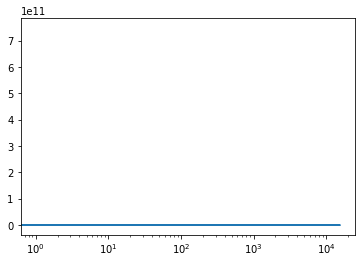

In [5]:
import matplotlib.pyplot as plt
import numpy as np

dataobj = data[1][:,4]
#print(dataobj)
t = np.arange(0,len(dataobj))
#t = np.arange(0,1,1/len(dataobj))
print(t)
sp = np.fft.fft(dataobj)
freq = np.fft.fftfreq(dataobj.size, d=32e-6)
#freq = t
print(sp.real)
plt.xscale('log')
#plt.yscale('log')
plt.plot(freq,abs(sp)**2)